In [2]:
import torch as tr
import numpy as np
from CSW import *

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
def load_ysm_subj(seed,blocklen):
  fname = 'ysm-blocklen%i-seed%i.npy'%(blocklen,seed)
  fpath = 'eval_data/20jan15/'+fname
  return np.load(fpath)

def load_ysm(blocklen,nnets=10):
  L = []
  for seed in range(nnets):
    L.append(load_ysm_subj(seed,blocklen))
  return np.array(L)


In [4]:
blocklen = 1
ysm = load_ysm(blocklen)
ysm.shape # (subj,graph,ep,tstep,unit)
ysmM = ysm.mean(0)
ysmS = ysm.std(0)/np.sqrt(len(ysm))

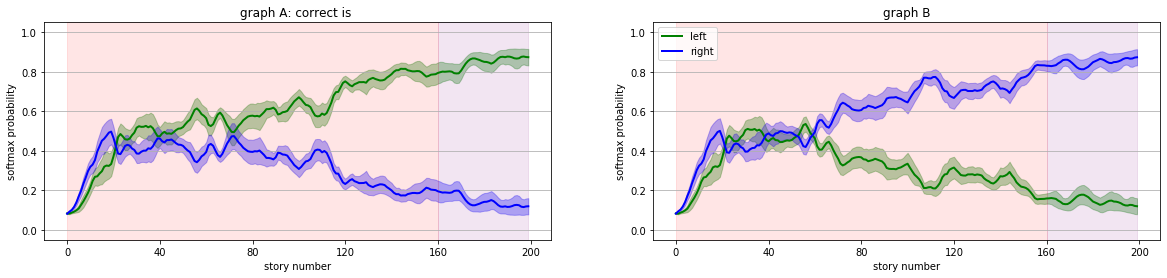

In [5]:
fig,axarr = plt.subplots(1,2,figsize=(20,4))

tstep = 2
nodes = (3,4)
cL=['g','b']
labL = ['left','right']
tL = ['graph A: correct is ','graph B']

for graphid in range(2):
  ax = axarr[graphid]
  ysmM_plt = ysmM[graphid,:,tstep,nodes]
  ysmS_plt = ysmS[graphid,:,tstep,nodes]

  for idx,(M,S) in enumerate(zip(ysmM_plt,ysmS_plt)):
    ax.plot(M,lw=2,c=cL[idx],label=labL[idx])
    ax.fill_between(range(200),M-S,M+S,color=cL[idx],alpha=.3,)
    ax.set_ylim(-.05,1.05)
    
  if blocklen==40:
    for b in range(4):
      ax.fill_between(range(b*40,(b*40)+41),-0.05,1.05,color=cL[(1+b)%2],alpha=.1)
  else:
    ax.fill_between(range(0,161),-0.05,1.05,color='r',alpha=.1)
  ax.fill_between(range(160,200),-0.05,1.05,color='purple',alpha=.1)
  ax.grid(axis='y')
  ax.set_ylabel('softmax probability')
  ax.set_xlabel('story number')
  ax.set_xticks(range(0,201,40))
  ax.set_title(tL[graphid])
plt.legend()
plt.savefig('figures/human_match_eval_blocklen%i.svg'%blocklen,format='svg')